# NHL Data EDA
### Brief Introduction
This is going to be the EDA of exploring some NHL data from the previous seasons. This data contains all games played in the last 6-8 years from the upload date: 2018-09-26 to the last revision in: 2020-12-11


### Importing all relevant libarys

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas_profiling
from pandas_profiling import ProfileReport

In [2]:
import sys
sys.path.append('..')

In [3]:
from scripts import ProjectFunctions as pf

### Importing Data Lists
The next line I am just importing the data from my local repository, this can be changed to a url or any other method for replicaton
- The [NHL DATA is from this Kaggle page.](https://www.kaggle.com/martinellis/nhl-game-data) for convienance

All data is provided and can be sourced from the NHL’s API, unofficial documentation can be found on Drew Hynes’ gitlab here: https://gitlab.com/dword4/nhlapi/-/blob/master/stats-api.md

In [4]:
k = "C:/Users/keati/Documents/Cosc301/Nhl_Data/game_teams_stats.csv"
l = "C:/Users/keati/Documents/Cosc301/Nhl_Data/team_info.csv"

### Cleaning up data
For easability I have created three functions to clean up the data bit and re-organize it into a more user friendly interface.

In [5]:
df1 = pf.CoachData(k)
df2 = pf.TeamData(k)
df3 = pf.TeamList(l)

### Starting to look at the cleaned up data
Just viewing the first five lines of each dataset to have an understanding of what we will be working with

In [6]:
df1.head()

,head_coach,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
0,Adam Oates,1,20,100.0,1077.0,988.0,431.0,107.0,19.0,2174.1,318.0,256.0,601.0
1,Adam Oates,15,68,383.0,3989.0,3239.0,1552.0,471.0,115.0,6745.5,1088.0,928.0,2106.0
2,Al Arbour,2,1,4.0,32.0,19.0,10.0,4.0,0.0,0.0,14.0,10.0,17.0
3,Al MacNeil,20,4,21.0,293.0,49.0,169.0,52.0,6.0,0.0,0.0,0.0,0.0
4,Alain Nasreddine,1,38,240.0,2634.0,1730.0,846.0,274.0,58.0,4002.4,868.0,638.0,1414.0


In [7]:
df2.head()

,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,giveaways,takeaways,blocked
0,833,4374.0,49450.0,28620.0,17873.0,5864.0,1039.0,12555.0,9805.0,18212.0
1,806,4741.0,51949.0,37955.0,20270.0,6233.0,1042.0,16190.0,13018.0,24341.0
2,869,4892.0,53456.0,38322.0,22213.0,6421.0,1123.0,14698.0,11678.0,22877.0
3,870,5011.0,52992.0,34016.0,22783.0,6480.0,1206.0,14078.0,9228.0,22261.0
4,932,5360.0,54643.0,38459.0,22207.0,6848.0,1354.0,12484.0,9196.0,22451.0


In [8]:
df3.head()

,team_id,shortName,teamName
0,1,New Jersey,Devils
1,2,NY Islanders,Islanders
2,3,NY Rangers,Rangers
3,4,Philadelphia,Flyers
4,5,Pittsburgh,Penguins


- Next we will use the .describe on each of our numeraical data to view each ones counts, mean, min and max for each category

In [9]:
df1.describe()

,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,17.435146,107.376569,612.138075,6587.518828,4215.058577,2587.146444,812.924686,146.949791,6368.620084,1762.234310,1345.677824,2656.895397
std,15.522110,106.240217,570.743185,6059.216931,4356.480391,2320.177297,747.024514,138.032870,8782.777889,1799.236342,1377.328708,2659.317493
min,1.000000,0.000000,2.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,33.000000,193.000000,2152.000000,818.500000,924.500000,285.500000,50.500000,0.000000,379.000000,282.500000,568.500000
50%,15.000000,76.000000,452.000000,4910.000000,3174.000000,2098.000000,634.000000,113.000000,2174.100000,1321.000000,902.000000,1933.000000
75%,24.000000,138.500000,854.500000,9237.000000,6297.500000,3622.000000,1114.500000,201.500000,9597.450000,2396.500000,2079.500000,4040.500000
max,90.000000,524.000000,2774.000000,29572.000000,21227.000000,12688.000000,4411.000000,721.000000,42188.100000,7371.000000,6897.000000,12108.000000


In [11]:
df2.describe()

,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,giveaways,takeaways,blocked
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,777.363636,4429.484848,47697.181818,30527.181818,18737.212121,5887.545455,1064.272727,12761.878788,9742.696970,19241.696970
std,195.270616,1045.499765,10944.249450,7269.476578,4724.719448,1396.226345,267.588569,3650.002643,2391.050011,4460.324193
min,258.000000,1429.000000,15780.000000,10556.000000,3643.000000,1349.000000,267.000000,4415.000000,4053.000000,6637.000000
25%,765.000000,4463.000000,49450.000000,28620.000000,18338.000000,6185.000000,1048.000000,11600.000000,9228.000000,19377.000000
50%,833.000000,4741.000000,51796.000000,32039.000000,20196.000000,6324.000000,1137.000000,13102.000000,10376.000000,20758.000000
75%,877.000000,5000.000000,53067.000000,35018.000000,21559.000000,6533.000000,1209.000000,15749.000000,11353.000000,21988.000000
max,980.000000,5360.000000,57517.000000,38794.000000,22783.000000,6848.000000,1354.000000,18535.000000,13018.000000,24341.000000


### Small Merge and Concat
For a bit more feasability and appeal I will be combining df3 with df1 and df2, this will just give the teams associted with each line so it is a bit easier to understand

In [17]:
df = pd.merge(df3,df1, how='inner')
total_df = pd.concat([df3,df2],axis=1).reindex(df2.index)

In [18]:
df.head()

,team_id,shortName,teamName,head_coach,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
0,1,New Jersey,Devils,Adam Oates,20,100.0,1077.0,988.0,431.0,107.0,19.0,2174.1,318.0,256.0,601.0
1,1,New Jersey,Devils,Alain Nasreddine,38,240.0,2634.0,1730.0,846.0,274.0,58.0,4002.4,868.0,638.0,1414.0
2,1,New Jersey,Devils,Brent Sutter,97,436.0,5060.0,2919.0,2032.0,627.0,108.0,0.0,989.0,974.0,1800.0
3,1,New Jersey,Devils,Claude Julien,47,200.0,2268.0,1304.0,801.0,355.0,63.0,0.0,825.0,622.0,1079.0
4,1,New Jersey,Devils,Jacques Lemaire,77,330.0,3822.0,2471.0,1225.0,406.0,68.0,2494.1,1094.0,805.0,1479.0


In [21]:
total_df.head()

,team_id,shortName,teamName,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,giveaways,takeaways,blocked
0,1,New Jersey,Devils,833,4374.0,49450.0,28620.0,17873.0,5864.0,1039.0,12555.0,9805.0,18212.0
1,2,NY Islanders,Islanders,806,4741.0,51949.0,37955.0,20270.0,6233.0,1042.0,16190.0,13018.0,24341.0
2,3,NY Rangers,Rangers,869,4892.0,53456.0,38322.0,22213.0,6421.0,1123.0,14698.0,11678.0,22877.0
3,4,Philadelphia,Flyers,870,5011.0,52992.0,34016.0,22783.0,6480.0,1206.0,14078.0,9228.0,22261.0
4,5,Pittsburgh,Penguins,932,5360.0,54643.0,38459.0,22207.0,6848.0,1354.0,12484.0,9196.0,22451.0


#### Now transiting to some more figures I will be starting off with graphing a heatmap of our datasets correlation between variables

- From this I was able to notice that alot of our categories appear to be correlatd with the few being on the lower end of the spectrum reaching about 0.5% correlation
- It is also interesting to note that there appears to be no negative correlations with any of our data

<AxesSubplot:>

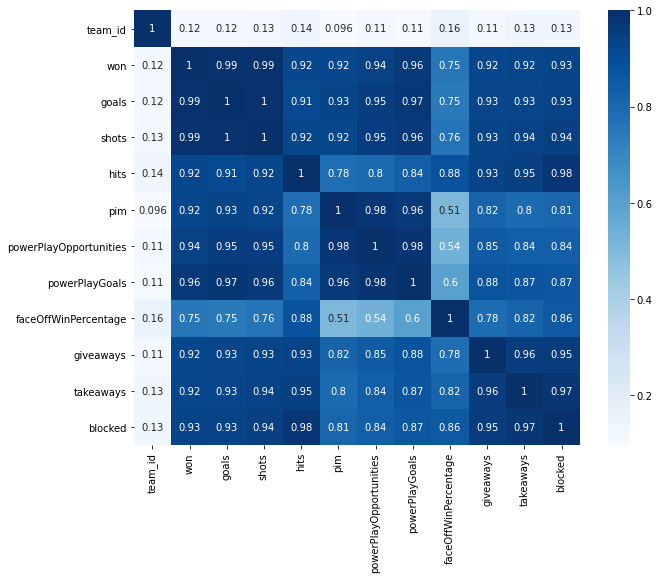

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

### Couple distrabutions
Next I wanted to take a look at a couple distrabuitons across a couple categorys the interested me, for this I was looking at: Shots,Goals, and Wins

- From this it was interesting to note that each graph had a right skew indicating that the mean was less than the mode, indicating that most values where clustered around the left end of the tail

<AxesSubplot:xlabel='shots', ylabel='Density'>

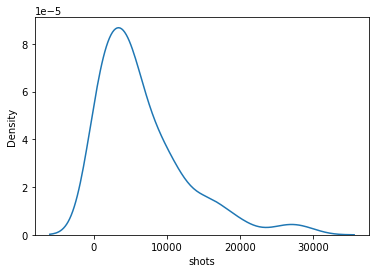

In [28]:
sns.kdeplot(df1['shots'])

<AxesSubplot:xlabel='won', ylabel='Density'>

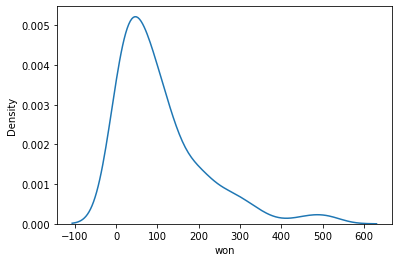

In [30]:
sns.kdeplot(df1['goals'])

<AxesSubplot:xlabel='won', ylabel='Density'>

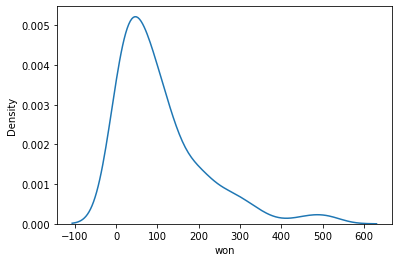

In [33]:
sns.kdeplot(df1['won'])

### Most wins for each coach and total team wins for the data
- Lastly the last thing I wanted to check out where the total wins for each coach regardless of there tenature as head coach, This was interesting to see the total amount of wins distributed accross each individual. It was was interesting as the barplot showed the vary confidence intervals for each coach
- As well I wanted to simply explore the total win over the last couple of years for each indiviual Team as shown below

<AxesSubplot:xlabel='won', ylabel='head_coach'>

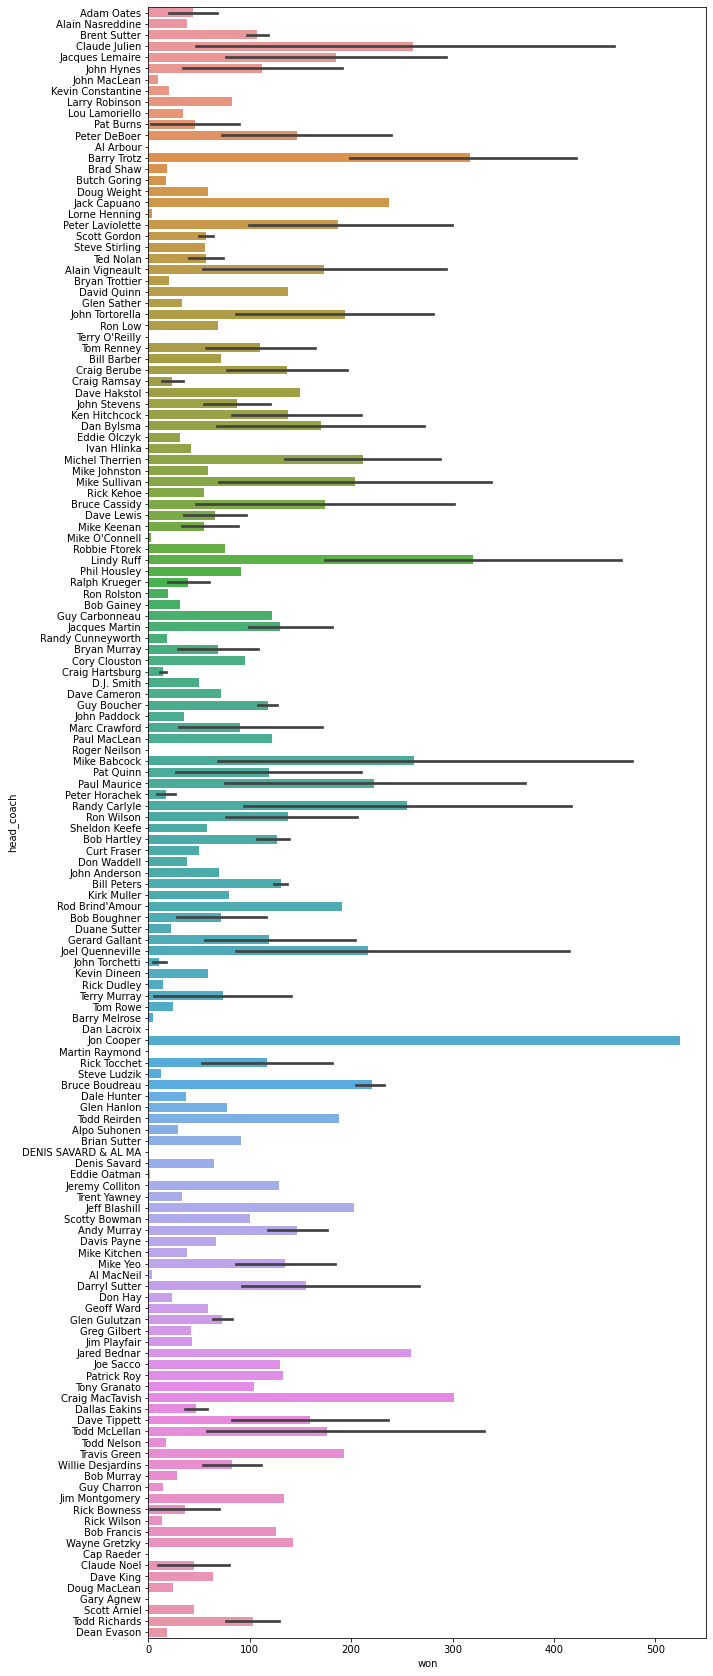

In [34]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x='won',y='head_coach',data=df)

<AxesSubplot:xlabel='won', ylabel='teamName'>

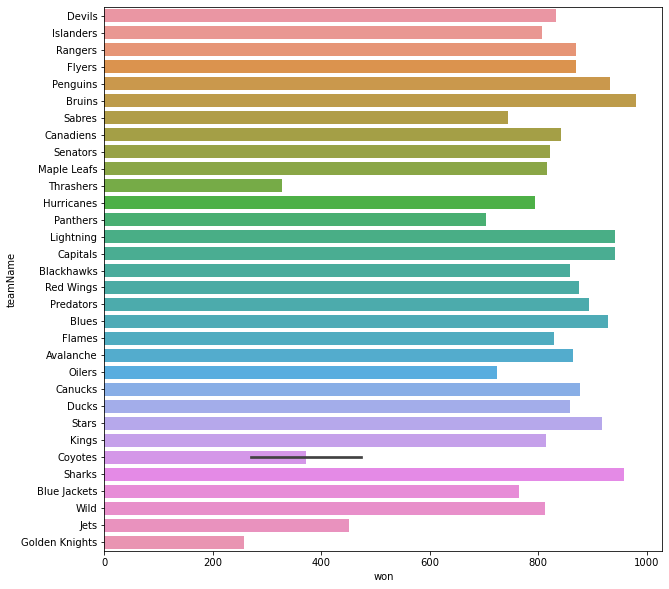

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x='won',y='teamName',data=total_df)